# USB WebCam Test

### Author : Oscar Noel Amaya Garcia
#### email  : dbanshee@gmail.com

Tested on : Thrust HD WebCam USB

In [8]:
# Check USB devices

!lsusb
!echo 
!ls /dev/video*

Bus 001 Device 007: ID 145f:019f Trust 
Bus 001 Device 005: ID 0424:7800 Standard Microsystems Corp. 
Bus 001 Device 003: ID 0424:2514 Standard Microsystems Corp. USB 2.0 Hub
Bus 001 Device 002: ID 0424:2514 Standard Microsystems Corp. USB 2.0 Hub
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub

/dev/video0  /dev/video10  /dev/video12  /dev/video14  /dev/video16
/dev/video1  /dev/video11  /dev/video13  /dev/video15  /dev/video18


In [ ]:
# It takes a long long time. Install older version 4.4.0.46 which is precompiled
#!sudo pip3 install opencv-python====4.4.0.46
#!sudo pip3 install opencv-contrib-python==4.4.0.46
#!sudo apt-get install libilmbase23
#  ImportError: libIlmImf-2_2.so.23: cannot open shared object file: No such file or directory


# Finally this appears to work
!sudo apt-get install python3-opencv
!sudo apt-get install python3-matplotlib
!sudo apt-get install libatlas3-base

# Need to open VideoCamera. Opencv raises error with no details? It doesn't have debug mode?
!sudo usermod -a -G video banshee

In [1]:
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [4]:
device = 0

## Aproach 1
Simple Getting image

In [2]:
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

In [3]:
%time
ret, frame = cap.read()
print('ret : ' + str(ret))

# On some webcams, something weird happens. opencv don't returns current frame. It appears to maintain an internal buffer or similar. Need to make severan petitions

CPU times: user 35 µs, sys: 3 µs, total: 38 µs
Wall time: 71.5 µs
ret : True


In [7]:
print(type(frame))
print('Shape : ' + str(frame.shape))

print(frame.all() == None)

<class 'numpy.ndarray'>
Shape : (480, 640, 3)
False


In [28]:
frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

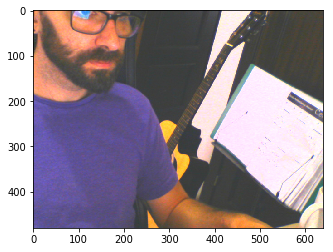

In [8]:
#cv2.imshow('Input', frame) # For use without jupyter maybe?
clear_output(wait=True)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
# Free Camera
cap.release()

## Aproach 2

On some webcams, something weird happens. opencv don't returns current frame. It appears to maintain an internal buffer or similar. Need to make severan petitions.
Another aproach creating a thread that continously get current frame

In [2]:
import threading

class WebcamImageGetter:

    def __init__(self, device):
        self.end = False
        self.currentFrame = None
        #self.CAMERA_WIDTH = #webcam width
        #self.CAMERA_HEIGHT = #webcam height
        #self.CAMERA_NUM = 0

        self.capture = cv2.VideoCapture(device) #Put in correct capture number here
        # OpenCV by default gets a half resolution image so we manually set the correct resolution
        #self.capture.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH,self.CAMERA_WIDTH)
        #self.capture.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT,self.CAMERA_HEIGHT)

    #Starts updating the images in a thread
    def start(self):
        threading.Thread(target=self.doLoop, args=()).start()

    #Continually updates the frame
    def doLoop(self):
        while(not(self.end)):
            ret, self.currentFrame = self.capture.read()

            while (ret == False): #Continually grab frames until we get a good one
                ret, frame = self.capture.read()
        self.capture.release()
        
    def getFrame(self):
        return self.currentFrame
    
    def setEnd(self):
        self.end = True

In [5]:
webCamGetter = WebcamImageGetter(device)
webCamGetter.start()

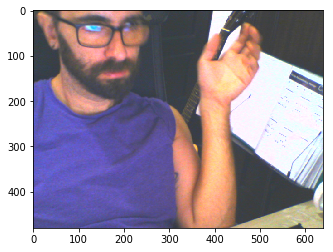

In [10]:
frame = webCamGetter.getFrame()
#clear_output(wait=True)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
%time
# Test Max FPS Camera 

import time
import math

#print(math.floor(cTime))
nFrames = 0
cTime = math.floor(time.time())

while(cTime == math.floor(time.time())):
    frame = webCamGetter.getFrame()
    nFrames = nFrames + 1

print('Total Frames : ' + str(nFrames) + ' FPS')

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 34.6 µs
Total Frames : 228904 FPS


In [11]:
webCamGetter.setEnd()